# PROPHET MODELS 2


In this notebook, we are going to fit Prophet models by using the dataset with COVID data.

### 📑 Index
* [1. FIRST PROPHET MODEL](#first_model)
* [2. PROPHET MODEL WITH HOLIDAYS](#hol)
* [3. PROPHET MODEL WITH HOLIDAYS BEST PARAMETERS USING](#best)

We import the packages.

In [1]:
import numpy as np
import pandas as pd
import itertools

import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('fbprophet').setLevel(logging.WARNING)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style ={
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor': '#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.6',
    'axes.labelcolor': '0.6',
    'xtick.color': '0.6',
    'ytick.color': '0.6',
    'font.size': 12}
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18, 7)

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

We load the data and consider that our data set goes from 2003 to 2023 (WITH COVID).

In [73]:
df = pd.read_csv("C:/Users/Juanfran cd/Desktop/MATEMATICAS UA/TFG/air traffic.csv", encoding="ISO-8859-1")

# Clean and convert 'Pax' to number
df['Pax'] = df['Pax'].str.replace(',', '', regex=True).astype(float)

# Create date column in YYYY-MM format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2), format='%Y-%m')

# Keep only the 'Date' and 'Pax' columns
df1 = df[['Date', 'Pax']]

Plot of the time series

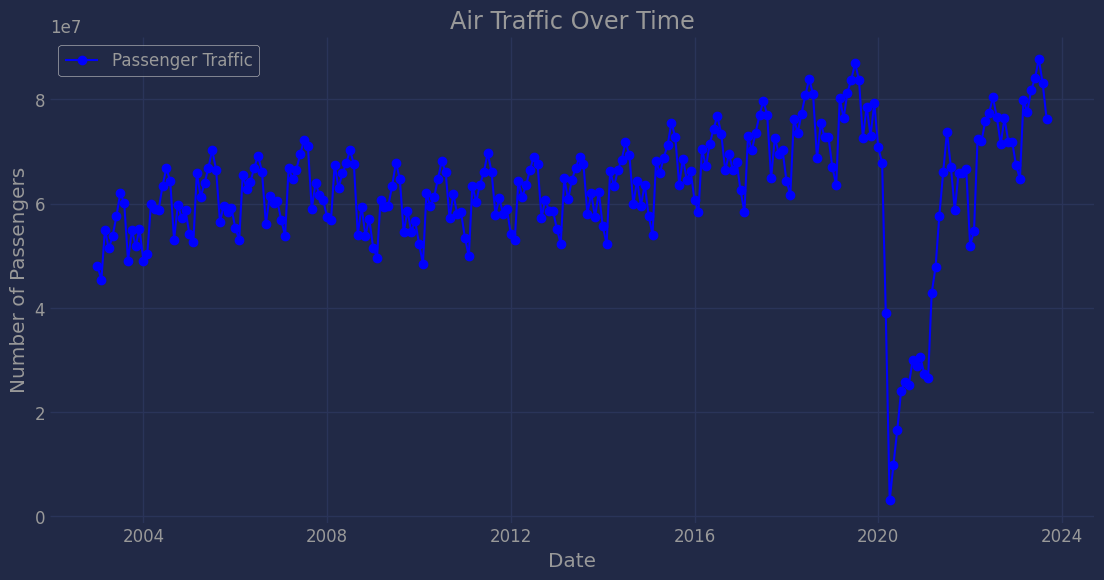

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Pax'], marker='o', linestyle='-', color='b', label='Passenger Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Traffic Over Time')
plt.grid(True)
plt.legend()
plt.show()

We split our data set into 2: a training set (from 2003 to 2021) and a test set (from 2022 to 2023).

In [75]:
train = df1.loc[df1['Date'] <= '2021-12-01']
test = df1.loc[df1['Date'] >= '2022-01-01']

Plot of Training-Test split

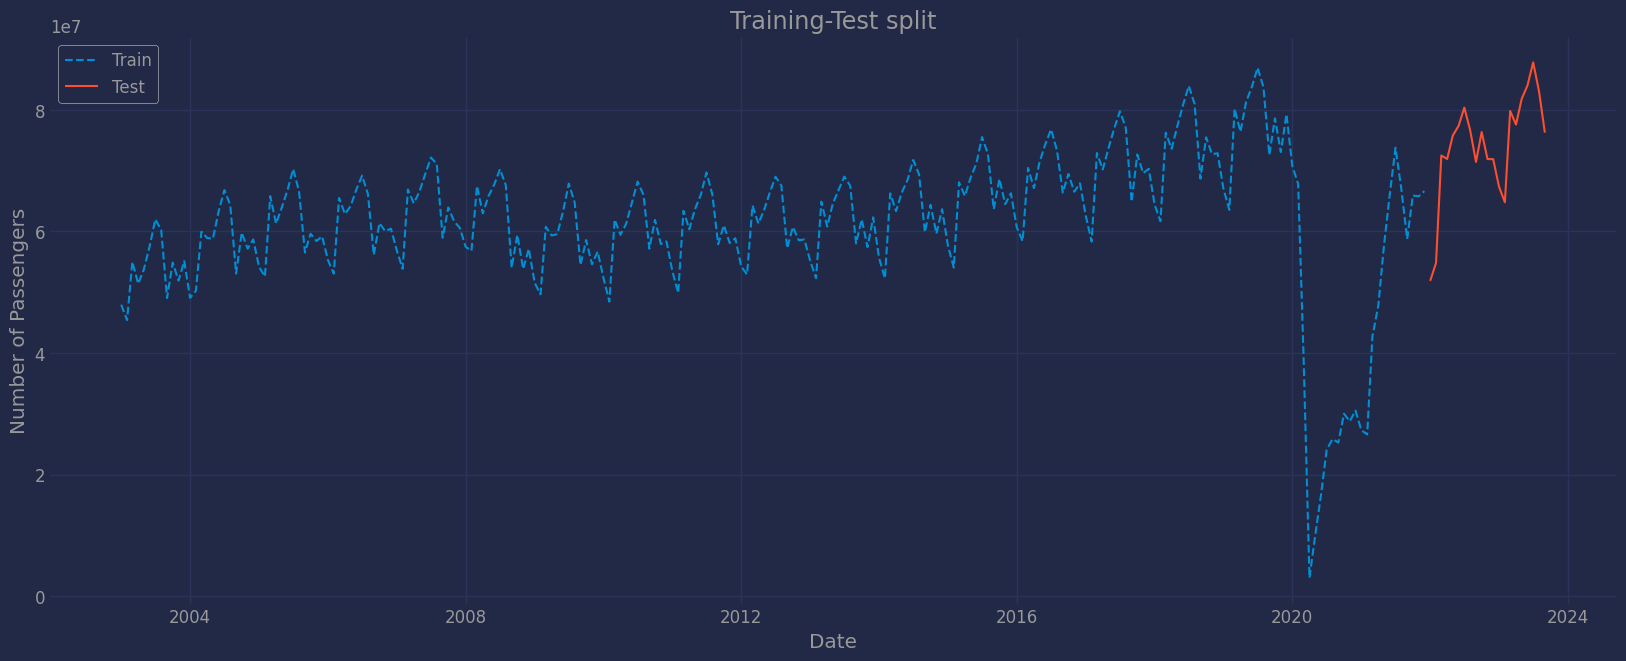

In [40]:
sns.lineplot(data=train, x='Date', y='Pax', label='Train', linestyle='--')
sns.lineplot(data=test, x='Date', y='Pax', label='Test')
plt.title('Training-Test split')
plt.ylabel('Number of Passengers')
plt.show()

<a id='first_model'></a>
## 1. FIRST PROPHET MODEL

Prophet expects the data to be formatted in a specific way. The model expects a column *ds* containing the dates and a column *y* containing the values we want to model/forecast.

In [76]:
train = train.rename(columns={'Date': 'ds', 'Pax': 'y'})

In [77]:
model = Prophet()

# Train the model
model.fit(train)

# Generate 21 months of future data
future = model.make_future_dataframe(periods=21, freq='M') 
future['ds'] = future['ds'] + pd.offsets.MonthBegin()

# Forecasting
forecast = model.predict(future)
forecast

17:23:26 - cmdstanpy - INFO - Chain [1] start processing
17:23:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-02-01,5.772285e+07,3.449774e+07,6.259795e+07,5.772285e+07,5.772285e+07,-8.518092e+06,-8.518092e+06,-8.518092e+06,-8.518092e+06,-8.518092e+06,-8.518092e+06,0.0,0.0,0.0,4.920476e+07
1,2003-03-01,5.776964e+07,4.588071e+07,7.376306e+07,5.776964e+07,5.776964e+07,2.034630e+06,2.034630e+06,2.034630e+06,2.034630e+06,2.034630e+06,2.034630e+06,0.0,0.0,0.0,5.980427e+07
2,2003-04-01,5.782144e+07,4.272186e+07,6.943848e+07,5.782144e+07,5.782144e+07,-2.058073e+06,-2.058073e+06,-2.058073e+06,-2.058073e+06,-2.058073e+06,-2.058073e+06,0.0,0.0,0.0,5.576337e+07
3,2003-05-01,5.787158e+07,4.608967e+07,7.275908e+07,5.787158e+07,5.787158e+07,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,0.0,0.0,0.0,5.909768e+07
4,2003-06-01,5.792338e+07,4.901817e+07,7.562487e+07,5.792338e+07,5.792338e+07,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,0.0,0.0,0.0,6.256772e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,5.471312e+07,4.233267e+07,7.028031e+07,5.457430e+07,5.486860e+07,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,1.226108e+06,0.0,0.0,0.0,5.593923e+07
245,2023-06-01,5.457590e+07,4.614009e+07,7.227978e+07,5.442284e+07,5.474330e+07,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,4.644344e+06,0.0,0.0,0.0,5.922024e+07
246,2023-07-01,5.444310e+07,4.885942e+07,7.591057e+07,5.427692e+07,5.462653e+07,8.264452e+06,8.264452e+06,8.264452e+06,8.264452e+06,8.264452e+06,8.264452e+06,0.0,0.0,0.0,6.270755e+07
247,2023-08-01,5.430588e+07,4.685152e+07,7.266117e+07,5.412751e+07,5.450103e+07,5.618415e+06,5.618415e+06,5.618415e+06,5.618415e+06,5.618415e+06,5.618415e+06,0.0,0.0,0.0,5.992429e+07


Plot of Prophet Forecast

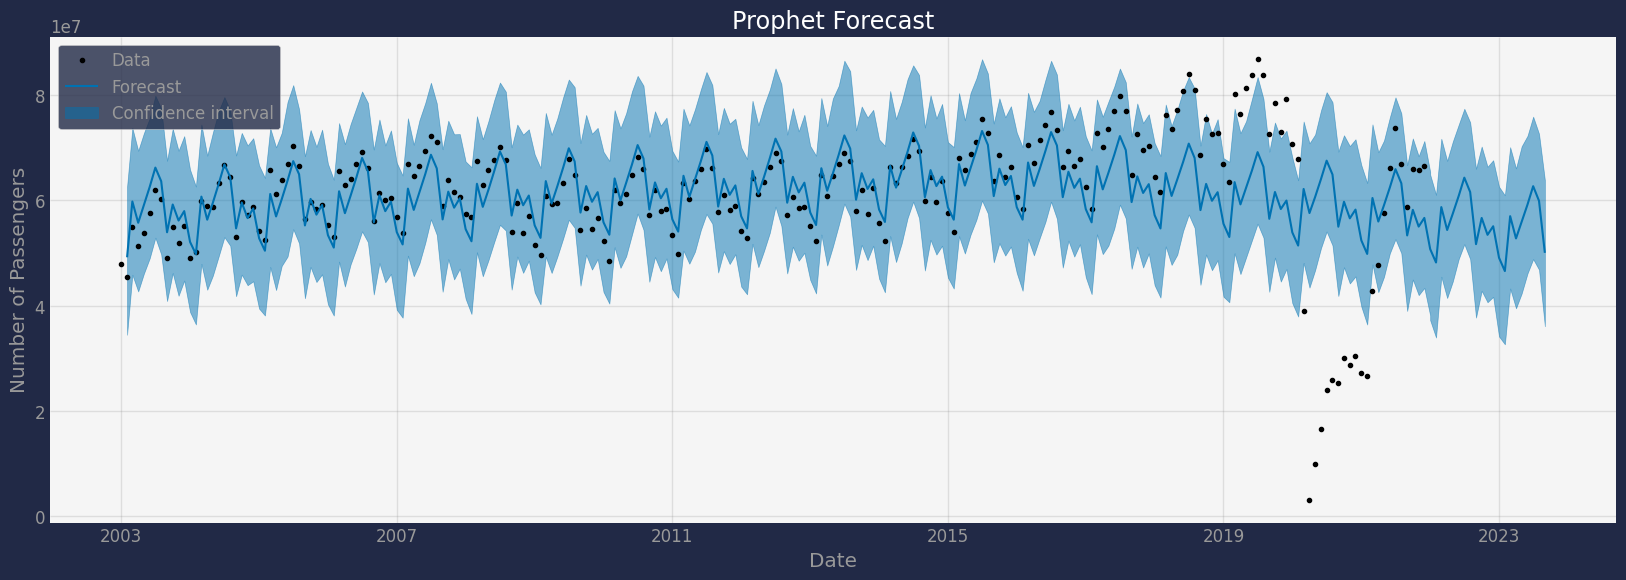

In [78]:
fig, ax = plt.subplots(figsize=(18,6))
plot_components = model.plot(forecast, ax=ax)

for collection in ax.collections:
    collection.set_alpha(0.5)

ax.legend(['Data', 'Forecast', 'Confidence interval'], loc='upper left')
ax.set_facecolor("whitesmoke")
plt.title('Prophet Forecast', color='white')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.savefig("../graphics/Prophet_con_covid/Prophet_forecast", dpi=300, bbox_inches="tight")
plt.show()

Prediction components

In [79]:
forecast_pred = forecast.tail(21)

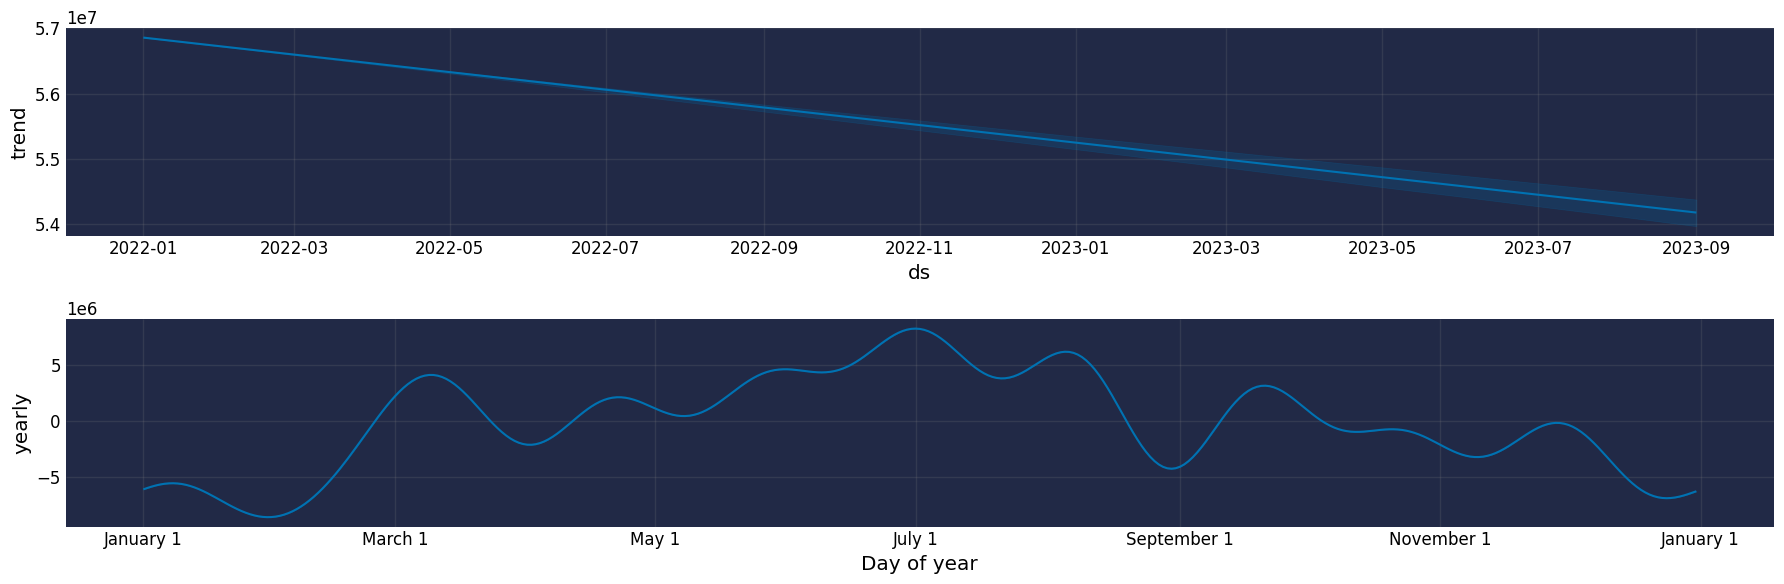

In [45]:
fig = model.plot_components(forecast_pred, figsize=(18,6))

for ax in fig.axes:
    ax.title.set_color('black') 
    ax.xaxis.label.set_color('black') 
    ax.yaxis.label.set_color('black') 
    ax.tick_params(axis='x', colors='black')  
    ax.tick_params(axis='y', colors='black')  

plt.show()

Prediction on test set

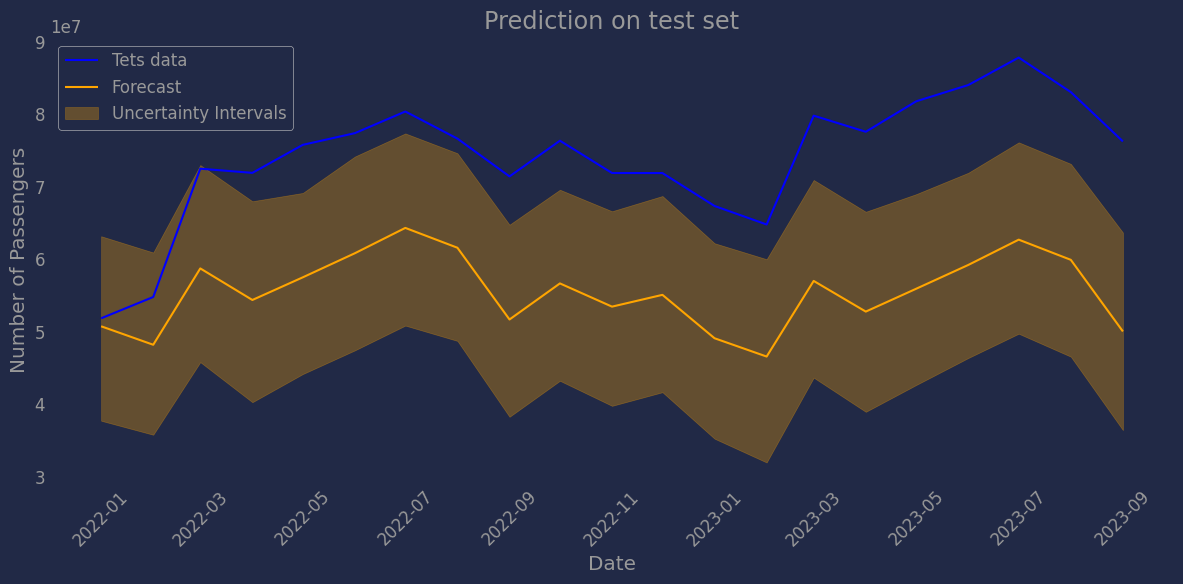

In [63]:
plt.figure(figsize=(12, 6))

plt.plot(test['Date'], test['Pax'], label='Tets data', color='blue')
plt.plot(forecast_pred['ds'], forecast_pred['yhat'], label='Forecast', color='orange')

plt.fill_between(forecast_pred['ds'], 
                 forecast_pred['yhat_lower'], 
                 forecast_pred['yhat_upper'], 
                 color='orange', alpha=0.3, label='Uncertainty Intervals')

ax = plt.gca() 
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Prediction on test set')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("../graphics/Prophet_con_covid/pred_test", dpi=300, bbox_inches="tight")
plt.show()

#### Error Metrics

In [47]:
from sklearn import metrics

def EVAL_METRICS_FUNC(y_true, y_pred):
    def MAPE(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Metric evaluation result:-')
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE: {MAPE(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}', end='\n\n')

For train set

In [80]:
forecast_pred_train = forecast.iloc[191:227] 
train_eval = train.iloc[192:228]

In [81]:
y_true = train_eval['y'].values
y_pred = forecast_pred_train['yhat'].values
print(EVAL_METRICS_FUNC(y_true, y_pred))

Metric evaluation result:-
MSE: 578469325181383.4
MAE: 20177454.09417502
RMSE: 24051389.2567848
MAPE: 111.65095388782855
R2: -0.0049994387089100645

None


For test set

In [82]:
y_true = test['Pax'].values
y_pred = forecast_pred['yhat'].values
print(EVAL_METRICS_FUNC(y_true, y_pred))

Metric evaluation result:-
MSE: 379184915957670.1
MAE: 18504707.619962342
RMSE: 19472671.00214221
MAPE: 24.407124133243588
R2: -4.095732445489221

None


<a id='crossval'></a>
## 2. PROPHET MODEL WITH HOLIDAYS

In [83]:
# Create a date range from January 2020 to September 2021, with the first day of each month
date_range = pd.date_range(start='2020-01-01', end='2021-09-01', freq='MS')

# Create a list of COVID month names
holidays = [f'COVID month {i+1}' for i in range(len(date_range))]

df_holidays = pd.DataFrame({
    'ds': date_range,
    'holiday': holidays
})

df_holidays

,ds,holiday
0,2020-01-01,COVID month 1
1,2020-02-01,COVID month 2
2,2020-03-01,COVID month 3
3,2020-04-01,COVID month 4
4,2020-05-01,COVID month 5
5,2020-06-01,COVID month 6
6,2020-07-01,COVID month 7
7,2020-08-01,COVID month 8
8,2020-09-01,COVID month 9
9,2020-10-01,COVID month 10


In [84]:
model_holidays = Prophet(holidays=df_holidays)

# Train the model
model_holidays.fit(train)

# Forecasting
forecast_holidays= model_holidays.predict(future)
forecast_holidays

17:23:49 - cmdstanpy - INFO - Chain [1] start processing
17:23:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,COVID month 1,COVID month 1_lower,COVID month 1_upper,COVID month 10,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-02-01,5.364981e+07,4.206333e+07,4.659822e+07,5.364981e+07,5.364981e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-9.365401e+06,-9.365401e+06,-9.365401e+06,0.0,0.0,0.0,4.428441e+07
1,2003-03-01,5.388814e+07,5.458053e+07,5.863118e+07,5.388814e+07,5.388814e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.695838e+06,2.695838e+06,2.695838e+06,0.0,0.0,0.0,5.658398e+07
2,2003-04-01,5.415201e+07,5.182323e+07,5.603683e+07,5.415201e+07,5.415201e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.091527e+05,-1.091527e+05,-1.091527e+05,0.0,0.0,0.0,5.404286e+07
3,2003-05-01,5.440736e+07,5.508794e+07,5.932166e+07,5.440736e+07,5.440736e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.789077e+06,2.789077e+06,2.789077e+06,0.0,0.0,0.0,5.719644e+07
4,2003-06-01,5.467123e+07,5.811789e+07,6.228298e+07,5.467123e+07,5.467123e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.422473e+06,5.422473e+06,5.422473e+06,0.0,0.0,0.0,6.009370e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,7.542556e+07,7.562844e+07,8.051668e+07,7.466173e+07,7.623858e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.789077e+06,2.789077e+06,2.789077e+06,0.0,0.0,0.0,7.821464e+07
245,2023-06-01,7.545290e+07,7.853648e+07,8.337472e+07,7.457311e+07,7.639418e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.422473e+06,5.422473e+06,5.422473e+06,0.0,0.0,0.0,8.087537e+07
246,2023-07-01,7.547935e+07,8.165379e+07,8.656966e+07,7.453295e+07,7.649413e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.678871e+06,8.678871e+06,8.678871e+06,0.0,0.0,0.0,8.415822e+07
247,2023-08-01,7.550669e+07,7.890262e+07,8.376897e+07,7.444621e+07,7.660222e+07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.801400e+06,5.801400e+06,5.801400e+06,0.0,0.0,0.0,8.130809e+07


Plot of Prophet Forecast with holidays

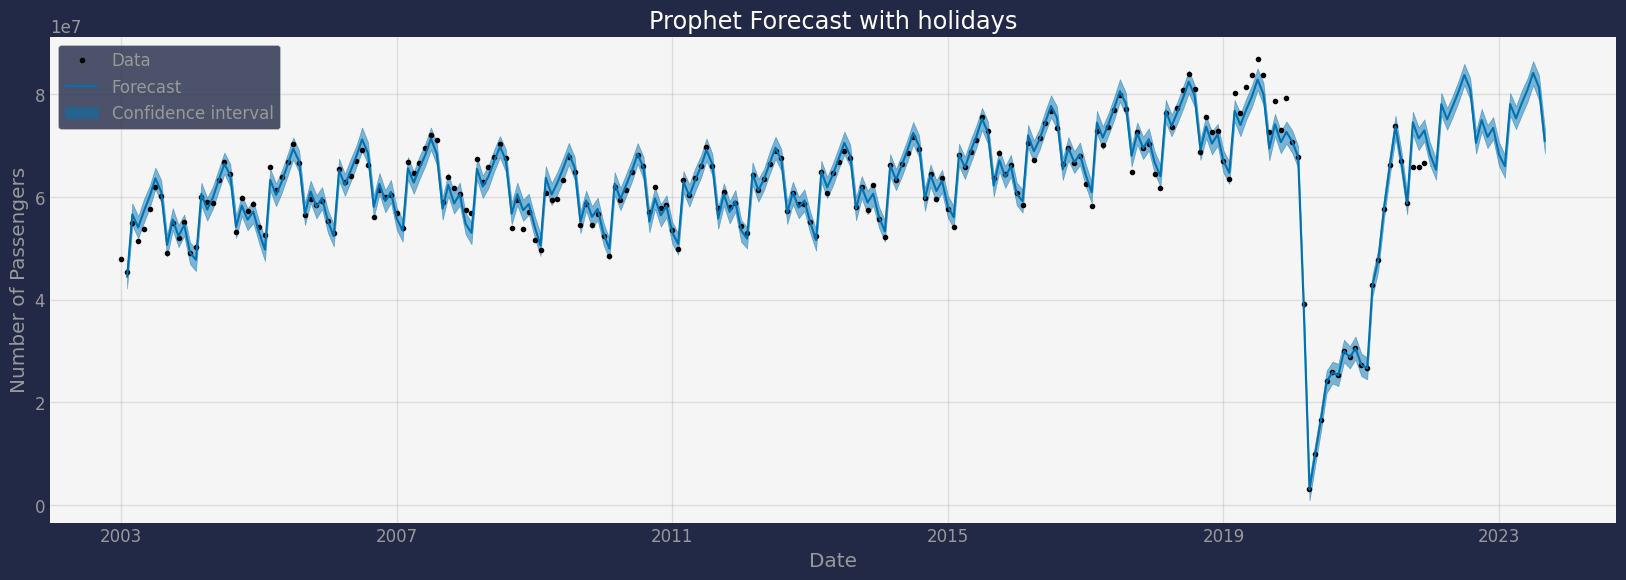

In [64]:
fig, ax = plt.subplots(figsize=(18,6))
plot_components = model_holidays.plot(forecast_holidays, ax=ax)

for collection in ax.collections:
    collection.set_alpha(0.5)

ax.legend(['Data', 'Forecast', 'Confidence interval'], loc='upper left')
ax.set_facecolor("whitesmoke")
plt.title('Prophet Forecast with holidays', color='white')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.savefig("../graphics/Prophet_con_covid/Prophet_hol", dpi=300, bbox_inches="tight")
plt.show()

Prediction components

In [85]:
forecast_pred_holidays = forecast_holidays.tail(21)

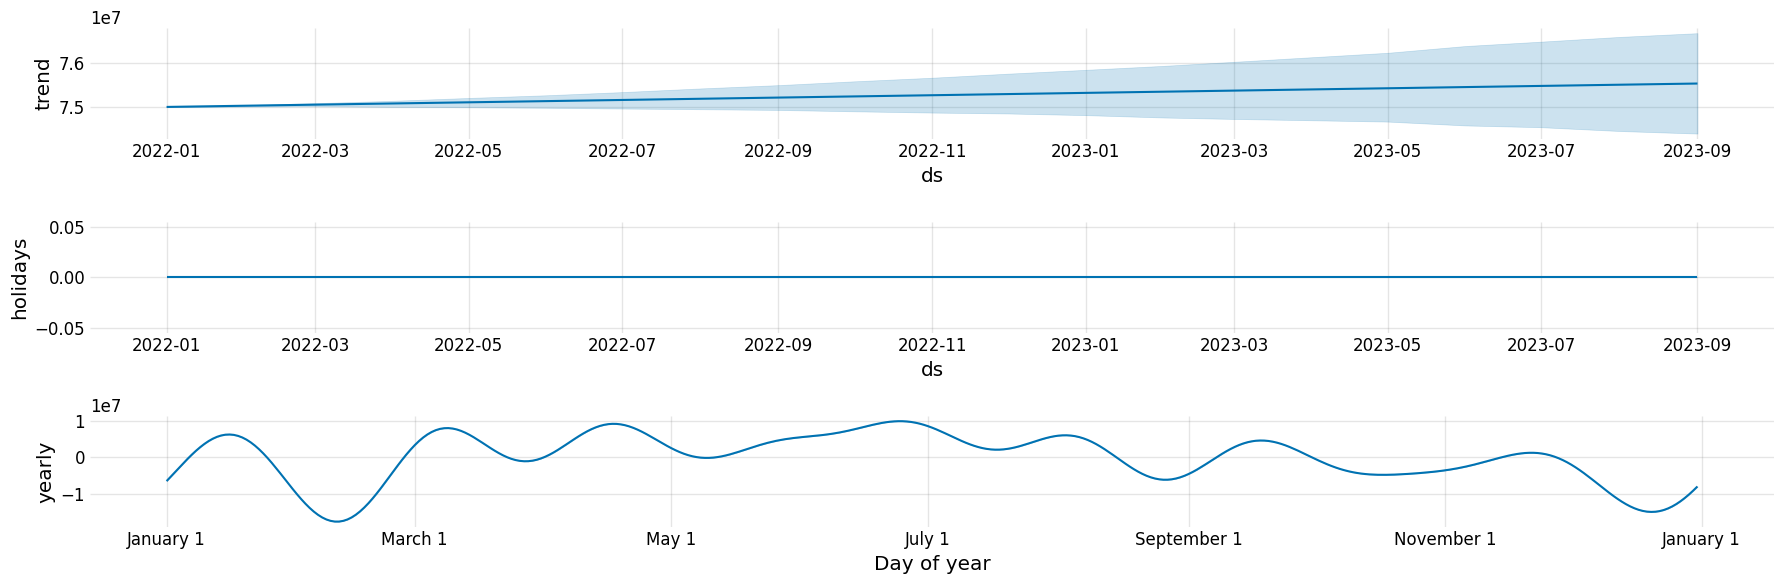

In [ ]:
fig = model_holidays.plot_components(forecast_pred_holidays, figsize=(18,6))

for ax in fig.axes:
    ax.set_facecolor("white") 
    ax.title.set_color("black")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    ax.tick_params(axis="x", colors="black")
    ax.tick_params(axis="y", colors="black")

plt.savefig("../graphics/Prophet_con_covid/componentes.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


Prediction with holidays on test set

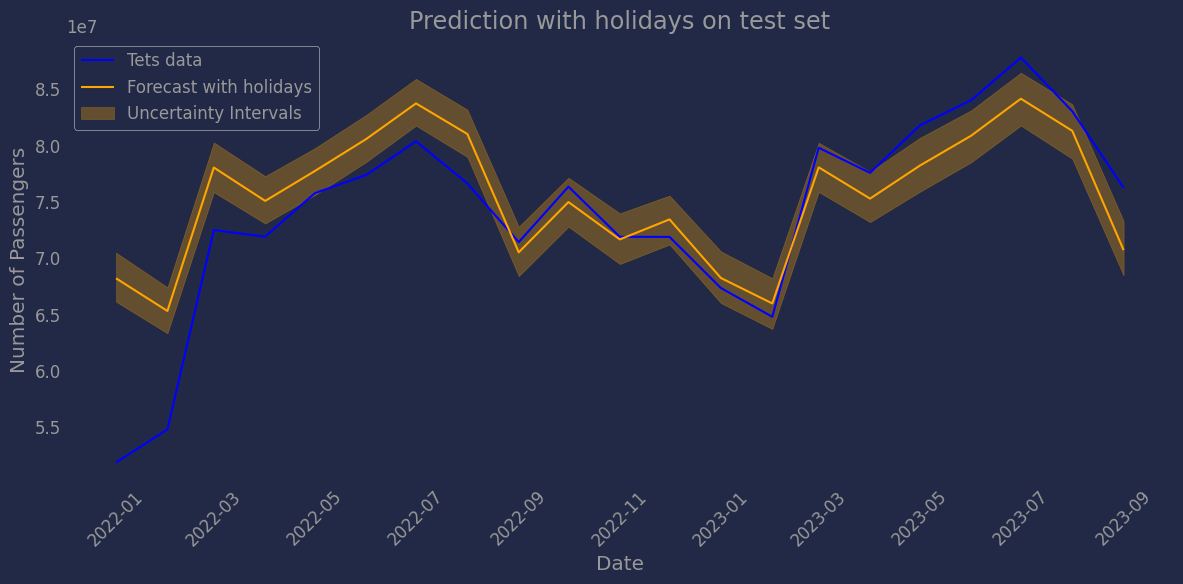

In [56]:
plt.figure(figsize=(12, 6))

plt.plot(test['Date'], test['Pax'], label='Tets data', color='blue')
plt.plot(forecast_pred_holidays['ds'], forecast_pred_holidays['yhat'], label='Forecast with holidays', color='orange')

plt.fill_between(forecast_pred_holidays['ds'], 
                 forecast_pred_holidays['yhat_lower'], 
                 forecast_pred_holidays['yhat_upper'], 
                 color='orange', alpha=0.3, label='Uncertainty Intervals')

ax = plt.gca() 
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Prediction with holidays on test set')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#### Error Metrics

For train set

In [57]:
forecast_holidays_pred_train = forecast_holidays.iloc[191:227] 
train_eval = train.iloc[192:228]

In [58]:
y_true = train_eval['y'].values
y_pred = forecast_holidays_pred_train['yhat'].values
print(EVAL_METRICS_FUNC(y_true, y_pred))

Metric evaluation result:-
MSE: 8648014863957.328
MAE: 1691533.6384593986
RMSE: 2940750.731353701
MAPE: 2.3061842756157205
R2: 0.9849754348141135

None


For test set

In [59]:
y_true = test['Pax'].values
y_pred_holidays = forecast_pred_holidays['yhat'].values
print(EVAL_METRICS_FUNC(y_true, y_pred_holidays))

Metric evaluation result:-
MSE: 26124861116753.766
MAE: 3633404.240267308
RMSE: 5111248.489043921
MAPE: 5.469043981041702
R2: 0.6489171989072391

None


It seems to be overfitting as the metrics for the evaluation set are significantly lower than those for the test set.

Comparison between predictions without holidays and predictions with holidays on test set.

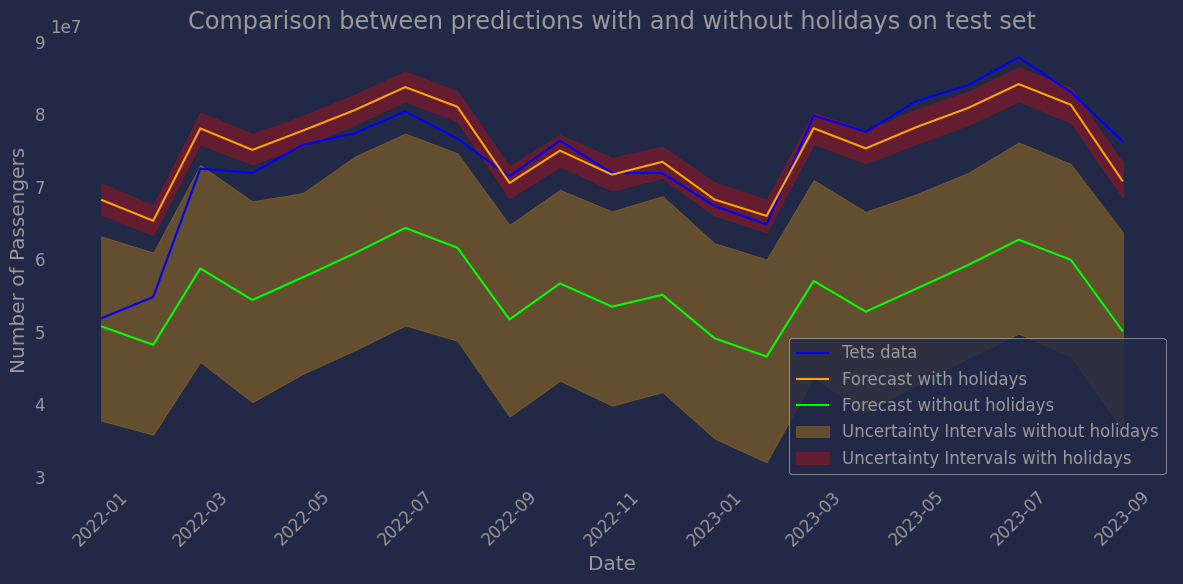

In [65]:
plt.figure(figsize=(12, 6))

plt.plot(test['Date'], test['Pax'], label='Tets data', color='blue')
plt.plot(forecast_pred_holidays['ds'], forecast_pred_holidays['yhat'], label='Forecast with holidays', color='orange')
plt.plot(forecast_pred['ds'], forecast_pred['yhat'], label='Forecast without holidays', color='lime')

plt.fill_between(forecast_pred['ds'], 
                 forecast_pred['yhat_lower'], 
                 forecast_pred['yhat_upper'], 
                 color='orange', alpha=0.3, label='Uncertainty Intervals without holidays')

plt.fill_between(forecast_pred_holidays['ds'], 
                 forecast_pred_holidays['yhat_lower'], 
                 forecast_pred_holidays['yhat_upper'], 
                 color='red', alpha=0.3, label='Uncertainty Intervals with holidays')

ax = plt.gca() 
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Comparison between predictions with and without holidays on test set')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("../graphics/Prophet_con_covid/comparison", dpi=300, bbox_inches="tight")
plt.show()

<a id='best'></a>
## 3. PROPHET MODEL WITH HOLIDAYS BEST PARAMETERS USING

Let's find the best parameters automatically from combinations and using cross-validation.

In [88]:
train['cap'] = 1.0e8  # For example, set a capacity of 100 million

In [27]:
param_grid = {
    'changepoint_prior_scale': [0.005, 0.05, 0.5],
    'changepoint_range': [0.68, 0.8, 0.92],
    'seasonality_prior_scale': [0.05, 1.0],
    'holidays_prior_scale': [0.05, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'yearly_seasonality': [3, 10, 20],
}

# Generate all possible combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Evaluate each set of parameters in cross-validation
rmse_scores = []

for params in all_params:
    model = Prophet(holidays=df_holidays, **params)
    model.fit(train)
    
    # Cross-validation within the training set
    df_cv = cross_validation(model, horizon='730 days', period='365 days', initial='3650 days', disable_tqdm=True)

    df_p = performance_metrics(df_cv, metrics=['rmse'])
    
    rmse_scores.append(df_p['rmse'].values[0])

16:22:39 - cmdstanpy - INFO - Chain [1] start processing
16:22:39 - cmdstanpy - INFO - Chain [1] done processing
16:22:39 - cmdstanpy - INFO - Chain [1] start processing
16:22:40 - cmdstanpy - INFO - Chain [1] done processing
16:22:40 - cmdstanpy - INFO - Chain [1] start processing
16:22:40 - cmdstanpy - INFO - Chain [1] done processing
16:22:41 - cmdstanpy - INFO - Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing
16:22:41 - cmdstanpy - INFO - Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing
16:22:42 - cmdstanpy - INFO - Chain [1] start processing
16:22:42 - cmdstanpy - INFO - Chain [1] done processing
16:22:42 - cmdstanpy - INFO - Chain [1] start processing
16:22:42 - cmdstanpy - INFO - Chain [1] done processing
16:22:43 - cmdstanpy - INFO - Chain [1] start processing
16:22:43 - cmdstanpy - INFO - Chain [1] done processing
16:22:44 - cmdstanpy - INFO - Chain [1] start processing
16:22:44 - cmdstanpy - INFO - Chain [1]

In [89]:
best_parameters = all_params[np.argmin(rmse_scores)]
print("Best parameters:", best_parameters)

Best parameters: {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.8, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'yearly_seasonality': 20}


Fit and predict using the best parameters

In [90]:
model_best = Prophet(**best_parameters, holidays=df_holidays)
model_best.fit(train)

test = test.rename(columns={'Date': 'ds', 'Pax': 'y'})
test['cap'] = train['cap'].iloc[-1]

future = model_best.make_future_dataframe(periods=21, freq='M')
future['ds'] = future['ds'] + pd.offsets.MonthBegin()
future['cap'] = train['cap'].iloc[-1]
forecast_best = model_best.predict(test)

17:24:30 - cmdstanpy - INFO - Chain [1] start processing
17:24:31 - cmdstanpy - INFO - Chain [1] done processing


Finally, we evaluate the model with best parameters.

In [91]:
y_pred_best = forecast_best.tail(21)['yhat']
print(EVAL_METRICS_FUNC(y_true, y_pred_best))

Metric evaluation result:-
MSE: 22330779779038.504
MAE: 3899431.8603162766
RMSE: 4725545.447780447
MAPE: 5.617663739761715
R2: 0.6999045208174258

None


Plot of the forecasting with holidays and the best parameters model.

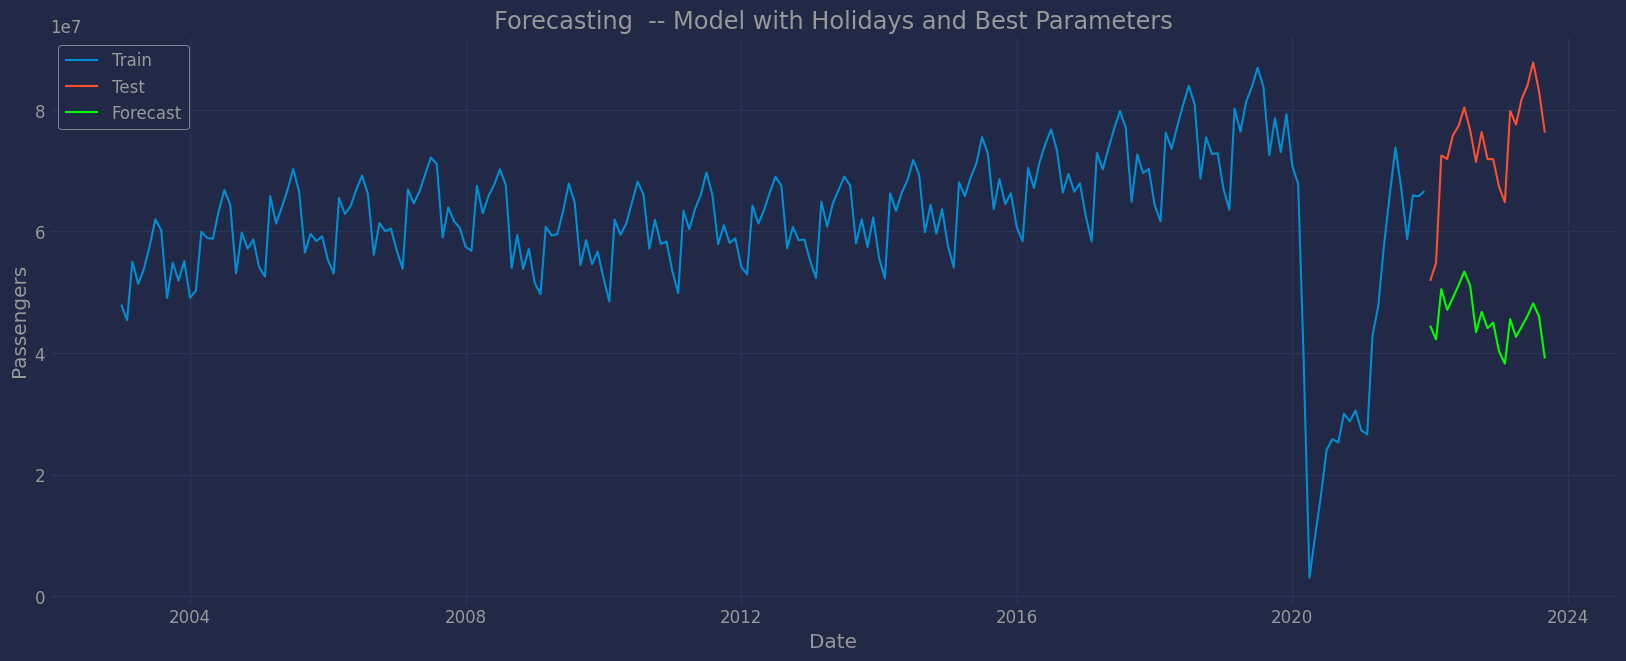

In [31]:
plt.figure(figsize=(18,7))
sns.lineplot(data=train, x='ds', y='y', label='Train')
sns.lineplot(data=test, x='ds', y='y', label='Test')
sns.lineplot(data=forecast_best, x='ds', y='yhat', label='Forecast', color='lime')
plt.title('Forecasting  -- Model with Holidays and Best Parameters')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

Plot of the predictions on test set with holidays the best parameters model.

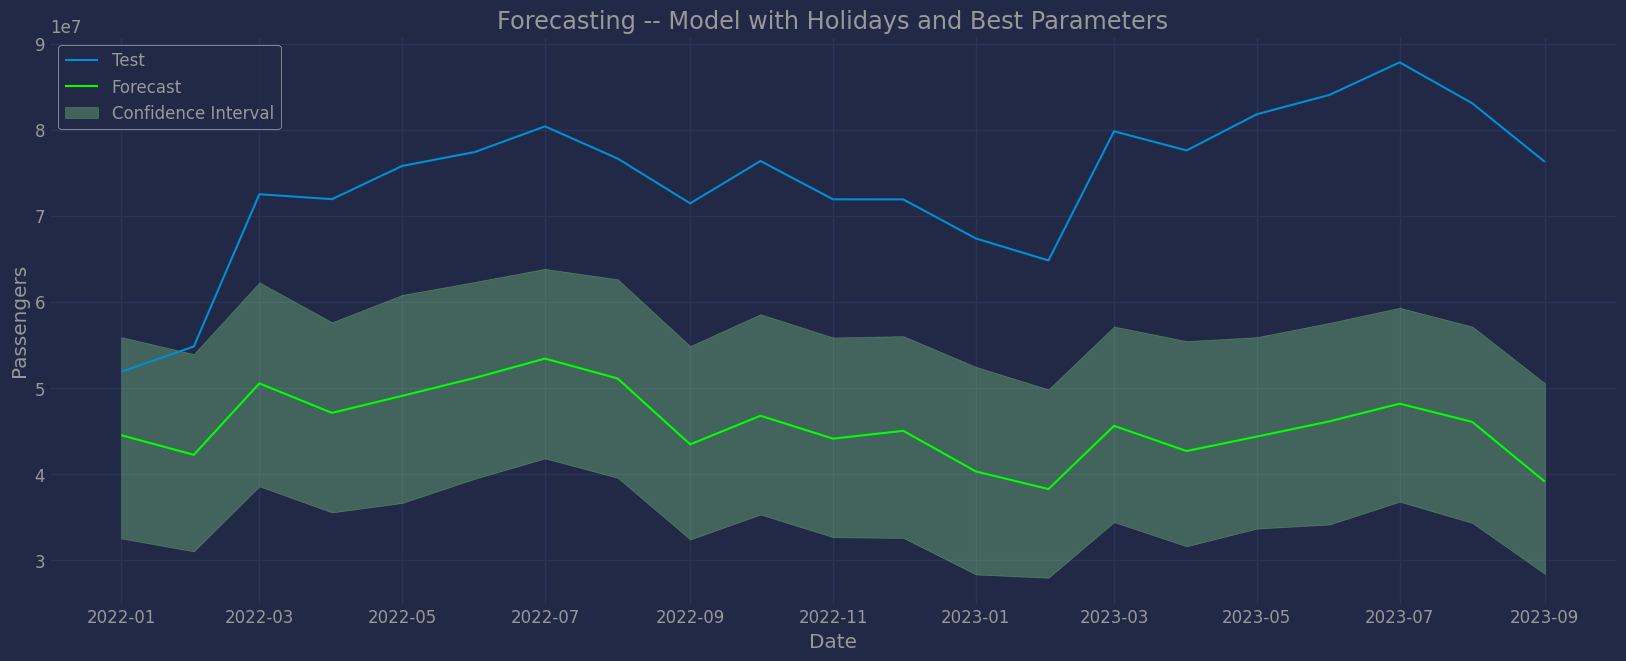

In [32]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=test, x='ds', y='y', label='Test')  
sns.lineplot(data=forecast_best, x='ds', y='yhat', label='Forecast', color='lime')

plt.fill_between(forecast_best['ds'], 
                 forecast_best['yhat_lower'], 
                 forecast_best['yhat_upper'], 
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

plt.title('Forecasting -- Model with Holidays and Best Parameters')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()


### ANOTHER MODEL

Now, since the last model has very large errors and predictions are not good, we fit another model by changing the paremeters *seasonality_prior_scale* and *holidays_prior_scale*.

In [33]:
param_grid = {
    'changepoint_prior_scale': [0.005, 0.05, 0.5],
    'changepoint_range': [0.68, 0.8, 0.92],
    'seasonality_prior_scale': [10.0],
    'holidays_prior_scale': [10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'yearly_seasonality': [5, 10, 20],
}

# Generate all possible combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Evaluate each set of parameters in cross-validation
rmse_scores = []

for params in all_params:
    model = Prophet(holidays=df_holidays, **params)
    model.fit(train)
    
    # Cross-validation within the training set
    df_cv = cross_validation(model, horizon='730 days', period='365 days', initial='3650 days', disable_tqdm=True)

    df_p = performance_metrics(df_cv, metrics=['rmse'])
    
    rmse_scores.append(df_p['rmse'].values[0])

16:55:59 - cmdstanpy - INFO - Chain [1] start processing
16:55:59 - cmdstanpy - INFO - Chain [1] done processing
16:55:59 - cmdstanpy - INFO - Chain [1] start processing
16:55:59 - cmdstanpy - INFO - Chain [1] done processing
16:56:00 - cmdstanpy - INFO - Chain [1] start processing
16:56:00 - cmdstanpy - INFO - Chain [1] done processing
16:56:01 - cmdstanpy - INFO - Chain [1] start processing
16:56:01 - cmdstanpy - INFO - Chain [1] done processing
16:56:01 - cmdstanpy - INFO - Chain [1] start processing
16:56:01 - cmdstanpy - INFO - Chain [1] done processing
16:56:01 - cmdstanpy - INFO - Chain [1] start processing
16:56:02 - cmdstanpy - INFO - Chain [1] done processing
16:56:02 - cmdstanpy - INFO - Chain [1] start processing
16:56:02 - cmdstanpy - INFO - Chain [1] done processing
16:56:02 - cmdstanpy - INFO - Chain [1] start processing
16:56:03 - cmdstanpy - INFO - Chain [1] done processing
16:56:03 - cmdstanpy - INFO - Chain [1] start processing
16:56:03 - cmdstanpy - INFO - Chain [1]

In [92]:
best_parameters1 = all_params[np.argmin(rmse_scores)]
print("Best parameters:", best_parameters1)

Best parameters: {'changepoint_prior_scale': 0.05, 'changepoint_range': 0.8, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'yearly_seasonality': 20}


In [95]:
model_best1 = Prophet(**best_parameters1, holidays=df_holidays)
model_best1.fit(train)

forecast_best1 = model_best1.predict(future)

17:25:23 - cmdstanpy - INFO - Chain [1] start processing
17:25:23 - cmdstanpy - INFO - Chain [1] done processing


#### Error metrics

In [102]:
forecast_best1_pred = forecast_best1.tail(21)

For train set

In [101]:
forecast_best1_pred_train = forecast_best1.iloc[191:227] 
train_eval = train.iloc[192:228]
y_true = train_eval['y'].values
y_pred = forecast_best1_pred_train['yhat'].values
print(EVAL_METRICS_FUNC(y_true, y_pred))

Metric evaluation result:-
MSE: 3875811420640.6216
MAE: 1128765.861067318
RMSE: 1968708.0587635695
MAPE: 1.723770750612473
R2: 0.9932663874595874

None


For test set

In [106]:
y_true = test['y'].values
y_pred_best1 = forecast_best1_pred.tail(21)['yhat']
print(EVAL_METRICS_FUNC(y_true, y_pred_best1))

Metric evaluation result:-
MSE: 22330779779038.504
MAE: 3899431.8603162766
RMSE: 4725545.447780447
MAPE: 5.617663739761715
R2: 0.6999045208174258

None


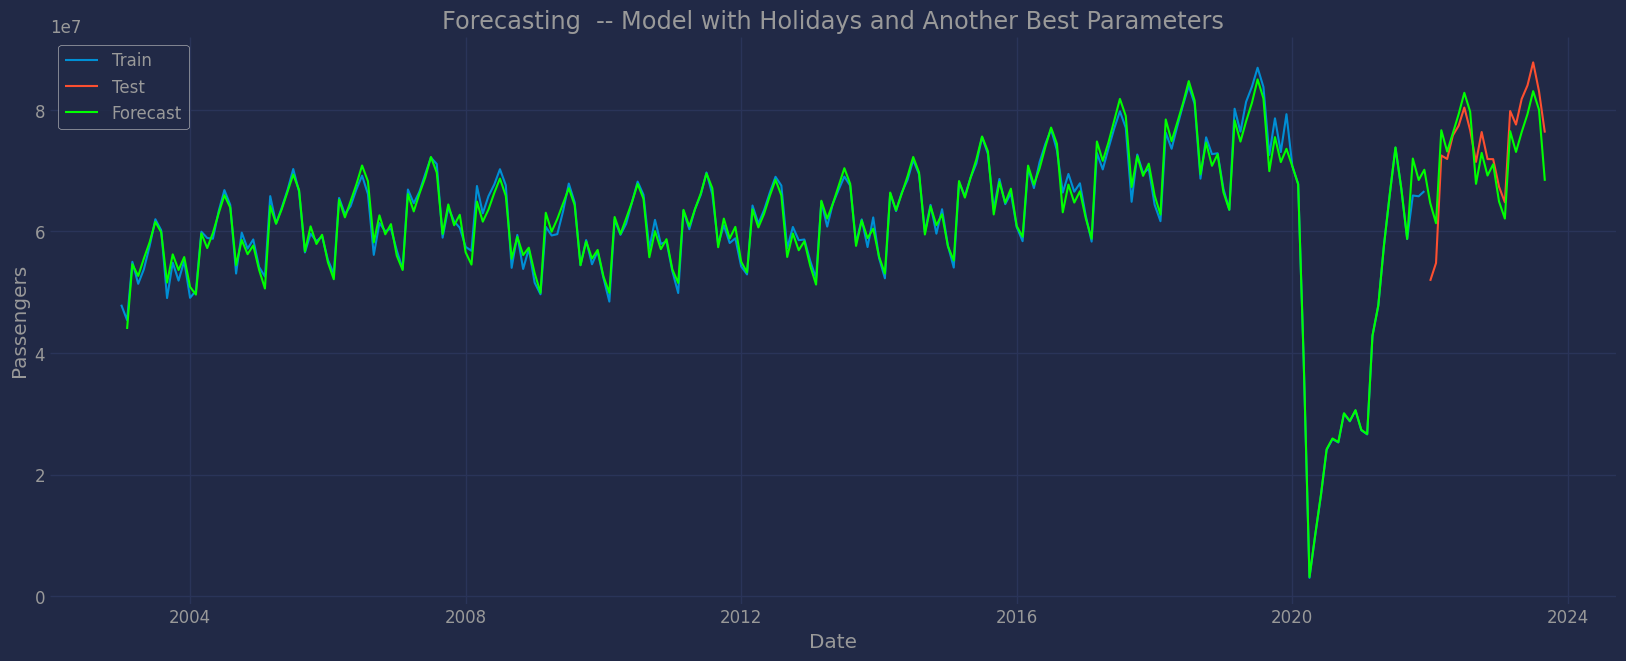

In [115]:
plt.figure(figsize=(18,7))
sns.lineplot(data=train, x='ds', y='y', label='Train')
sns.lineplot(data=test, x='ds', y='y', label='Test')
sns.lineplot(data=forecast_best1, x='ds', y='yhat', label='Forecast', color='lime')
plt.title('Forecasting  -- Model with Holidays and Another Best Parameters')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.savefig("../graphics/Prophet_con_covid/fore_best", dpi=300, bbox_inches="tight")
plt.show()

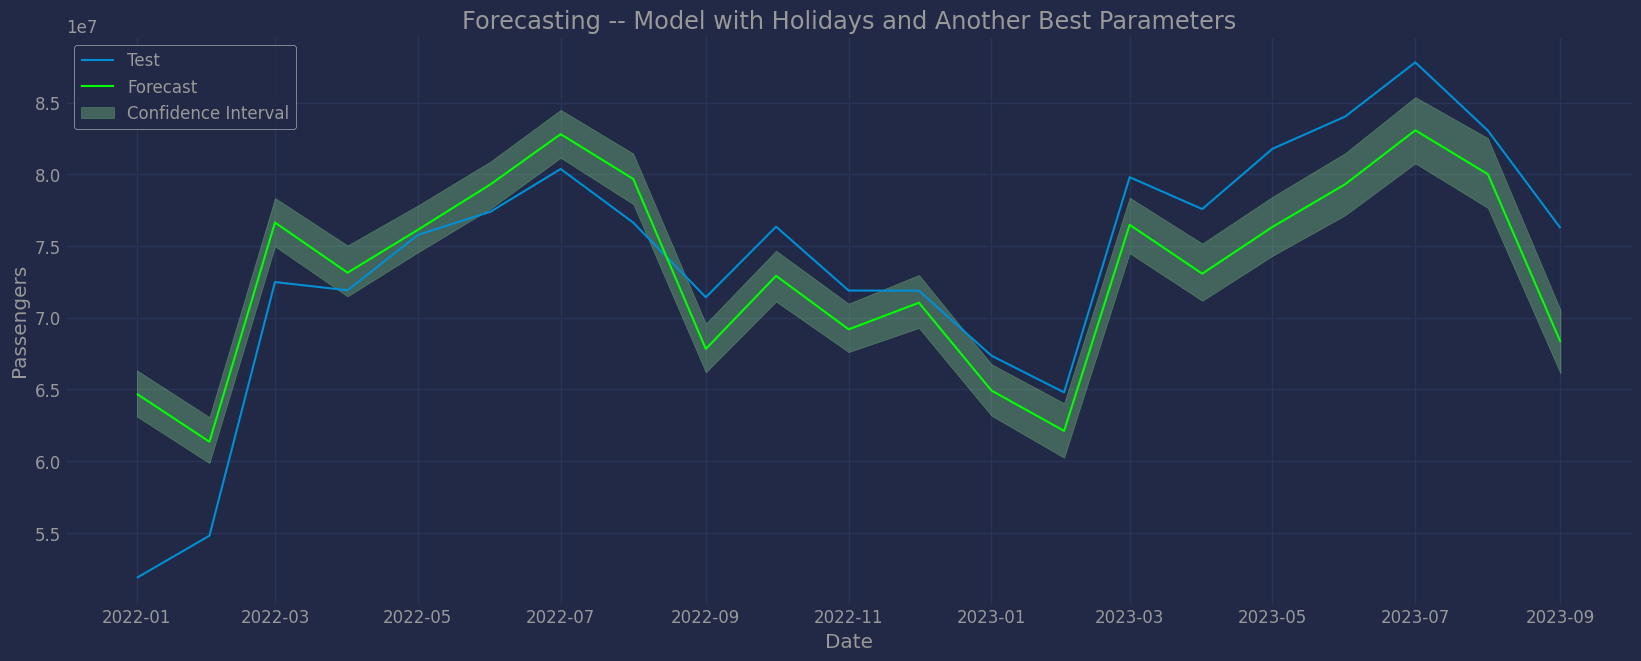

In [114]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=test, x='ds', y='y', label='Test')  
sns.lineplot(data=forecast_best1_pred, x='ds', y='yhat', label='Forecast', color='lime')

plt.fill_between(forecast_best1_pred['ds'], 
                 forecast_best1_pred['yhat_lower'], 
                 forecast_best1_pred['yhat_upper'], 
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

plt.title('Forecasting -- Model with Holidays and Another Best Parameters')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.savefig("../graphics/Prophet_con_covid/pred_best", dpi=300, bbox_inches="tight")
plt.show()
